<a href="https://colab.research.google.com/github/orinbou/PhysicsPythonColab/blob/main/daytime_yokohama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

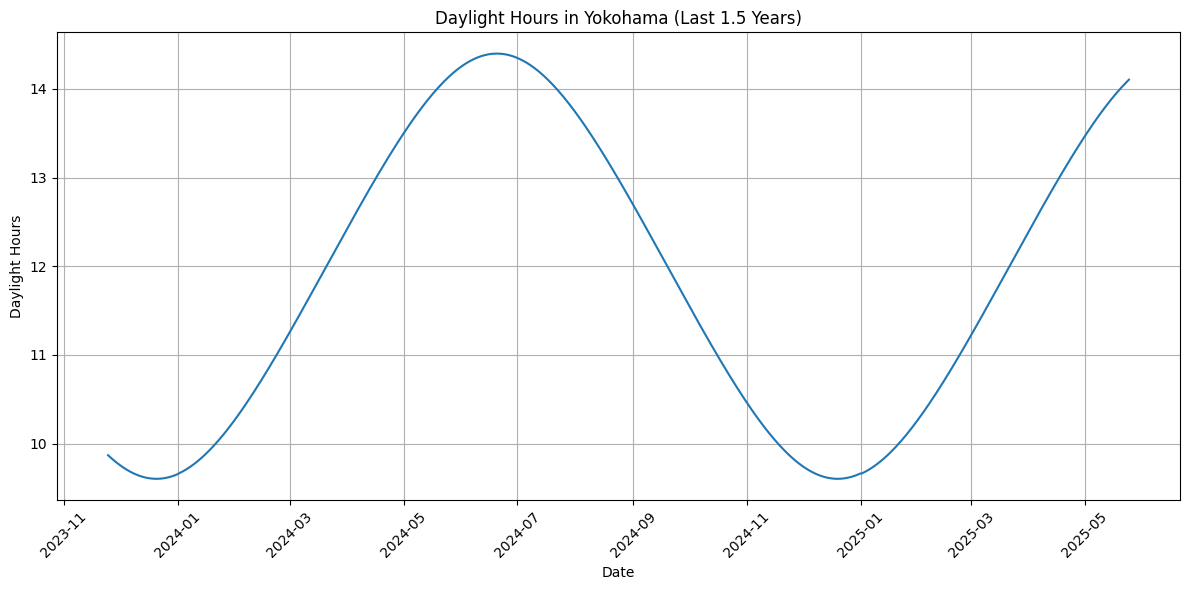

In [ ]:
# prompt: 横浜の直近1.5年分の日中時間の長さを外部のAPIを使わずにグラフにしてください。グラフのラベルは英語表記でお願いします

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Yokohama's latitude (approximate)
latitude_yokohama = 35.4437

# Function to calculate daylight hours based on latitude and day of the year
def calculate_daylight_hours(latitude, day_of_year):
    # Source for formula: https://en.wikipedia.org/wiki/Sunrise_equation#Daylight_duration
    # Using simplified version for daylight duration

    # Convert latitude to radians
    lat_rad = np.radians(latitude)

    # Obliquity of the ecliptic (approximate, in radians)
    epsilon = np.radians(23.45)

    # Solar declination angle (delta)
    # Approximation: delta = -arcsin(sin(epsilon) * cos(2 * pi * (day_of_year + 10) / 365.25))
    # Let's use a slightly more common approximation based on the analemma shape
    delta = epsilon * np.sin(2 * np.pi * (day_of_year - 80) / 365.25)

    # Calculate the hour angle (H) for sunrise/sunset
    # cos(H) = -tan(lat_rad) * tan(delta)
    # We need to handle cases where cos(H) is outside the range [-1, 1]
    cos_H = -np.tan(lat_rad) * np.tan(delta)
    cos_H = np.clip(cos_H, -1, 1) # Clip values to avoid arccos errors

    H = np.arccos(cos_H)

    # Daylight duration in hours = 2 * H * (180 / pi) / 15
    # Simplified: Daylight duration in hours = 2 * H / (pi / 12) = 24 * H / pi
    daylight_hours = 24 * H / np.pi

    return daylight_hours

# Define the date range (last 1.5 years from today)
end_date = datetime.now()
start_date = end_date - timedelta(days=int(365 * 1.5))

# Generate a range of dates
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate day of the year for each date
day_of_years = [(date - datetime(date.year, 1, 1)).days + 1 for date in date_range]

# Calculate daylight hours for each day
daylight_hours_list = [calculate_daylight_hours(latitude_yokohama, doy) for doy in day_of_years]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(date_range, daylight_hours_list)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Daylight Hours')
plt.title('Daylight Hours in Yokohama (Last 1.5 Years)')
plt.grid(True)

# Format x-axis to show dates clearly
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Show the plot
plt.show()
